**Evaluación módulo 3**

*Nicole Aliaga*


In [746]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\trico\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [747]:
# antes de empezar importamos las librerías que necesitaremos para poder trabajar con todos sus métodos. También configuramos la opción de ver todas las columnas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from scipy.stats import shapiro, kstest, poisson, chisquare, expon
from itertools import combinations



pd.set_option('display.max_columns', None)


In [748]:
# abrimos los ficheros para empezar con la EDA

df_flight_activity = pd.read_csv("Customer Flight Activity.csv", sep=",", header="infer")
print(df_flight_activity.head())
print(f"Tenemos {df_flight_activity.shape[0]} filas y {df_flight_activity.shape[1]} columnas") 

# Loyalty number es el identificador único por cliente, el que no se debería repetir. 
# Relación aparente entre flights booked, flights with companions y total flights
# Relación aparente entre Distance y Points accumulated

   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3             

In [749]:
df_flight_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [750]:
df_flight_activity.info()
# Podemos ver que no tiene valores nulos. Las 10 columnas son numéricas, 9 tipo int64 y 1 float, no hay variables categóricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [751]:
df_flight_activity.isnull().sum()[df_flight_activity.isnull().sum()>0]/df_flight_activity.shape[0]*100
# No hay nulos

Series([], dtype: float64)

In [752]:
var_categóricas_1 = df_flight_activity.select_dtypes(include = 'object').columns
var_categóricas_1
# No hay variables categóricas

Index([], dtype='object')

In [753]:
var_numericas_1 = df_flight_activity.select_dtypes(include = np.number).columns
var_numericas_1
# las 10 variables son numéricas

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [754]:
df_flight_activity.describe().T

# Los Loyalti number van de 100018 a 999986, siempre son de 6 digitos
# hay datos del 2017 y del 2018 y de los 12 meses.
# recordar que los fligts booked son por mes
# Quizas cambiar nombre a flights booked porque en realidad serían los viajes que realizó solo
# Pensar que sentido tiene una distancia recorrida de 0 kilómetros



,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [755]:
# ¿qué valores tenemos en cada columna?
for ind, col in enumerate(df_flight_activity.columns):
    print(ind, "--->", col)
    print(df_flight_activity[col].unique())
    print("---------------------")

0 ---> Loyalty Number
[100018 100102 100140 ... 999731 999788 999891]
---------------------
1 ---> Year
[2017 2018]
---------------------
2 ---> Month
[ 1  9  2  3 11  4  5  7  6  8 10 12]
---------------------
3 ---> Flights Booked
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
---------------------
4 ---> Flights with Companions
[ 0  4  7  1  6  3  5  2 10  8  9 11]
---------------------
5 ---> Total Flights
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
---------------------
6 ---> Distance
[1521 2030 1200 ... 1217  617 4135]
---------------------
7 ---> Points Accumulated
[152.   203.   120.   ...  18.75 601.   626.  ]
---------------------
8 ---> Points Redeemed
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 

In [756]:
## vemos si se registran a los clientes varias veces
df_flight_activity.duplicated(subset = 'Loyalty Number').sum()
#Hay 388 887 datos duplicados en la columna loyalty number

388887

In [757]:
df_flight_activity.duplicated().sum()
# Hay 1864 filas exactamente iguales

1864

In [758]:
df_flight_activity.head(6)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0


In [759]:
duplicados_1 = df_flight_activity[df_flight_activity.duplicated()]

# Contar la cantidad de veces que se repite cada fila
repeticiones_1 = duplicados_1.value_counts()
repeticiones_1.reset_index()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,count
0,678205,2017,7,0,0,0,0,0.0,0,0,2
1,678205,2018,1,0,0,0,0,0.0,0,0,2
2,678205,2017,11,0,0,0,0,0.0,0,0,2
3,678205,2017,10,0,0,0,0,0.0,0,0,2
4,678205,2017,9,0,0,0,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1843,455758,2018,12,0,0,0,0,0.0,0,0,1
1844,455758,2018,11,0,0,0,0,0.0,0,0,1
1845,455758,2018,10,0,0,0,0,0.0,0,0,1
1846,455758,2018,9,0,0,0,0,0.0,0,0,1


In [760]:
#Eliminamos filas duplicadas
df_flight_activity.drop_duplicates(inplace = True)

In [761]:
# Comprobamos si ya no hay filas duplicadas
df_flight_activity.duplicated().sum()

0

In [762]:
# Cuántas filas me deberían quedar si tenía 405624 filas y habían 1864 duplicadas? 

405624 - 1864

403760

In [763]:
# Compruebo cuántas filas tengo ahora
df_flight_activity.shape

(403760, 10)

In [764]:
df_flight_activity.groupby("Loyalty Number").count()
## podemos ver que hay 24 filas por cada cliente, probablemente sea una fila por mes, por 12 meses, por 2 años 2017 y 2018

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,24,24,24,24,24,24,24,24,24
100102,24,24,24,24,24,24,24,24,24
100140,24,24,24,24,24,24,24,24,24
100214,24,24,24,24,24,24,24,24,24
100272,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...
999902,24,24,24,24,24,24,24,24,24
999911,24,24,24,24,24,24,24,24,24
999940,24,24,24,24,24,24,24,24,24


In [765]:
# ¿La columna Total flights es la suma de las columnas Flights booked y flights wint companions?

es_suma = (df_flight_activity['Total Flights'] == df_flight_activity['Flights with Companions'] + df_flight_activity['Flights Booked']).all()

if es_suma :
    print("La columna 'Total Flights' es la suma de las columnas 'Flights with Companions' y 'Flights Booked'.")
else:
    print("La columna 'Total Flights' no es la suma de las columnas 'Flights with Companions' y 'Flights Booked'.")
# sí, por tanto cambiaré el nombre para que refleje mejor la información

La columna 'Total Flights' es la suma de las columnas 'Flights with Companions' y 'Flights Booked'.


In [766]:
# Cambiamos el nombre a la columna "Flights Booked" por "Unaccompanied Flights"

df_flight_activity.rename(columns={'Flights Booked': 'Unaccompanied Flights'}, inplace=True)
df_flight_activity.head()

,Loyalty Number,Year,Month,Unaccompanied Flights,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


---------------------------------------------------------------------------------------------------------------------------------------------

In [767]:
## Ahora empecemos con la exploración de la otra base de datos.
df_customer_loyalty = pd.read_csv("Customer Loyalty History.csv", sep=",", header="infer")
print(df_customer_loyalty.head().reset_index())
print(f"Tenemos {df_customer_loyalty.shape[0]} filas y {df_customer_loyalty.shape[1]} columnas") 

   index  Loyalty Number Country          Province       City Postal Code  \
0      0          480934  Canada           Ontario    Toronto     M2Z 4K1   
1      1          549612  Canada           Alberta   Edmonton     T3G 6Y6   
2      2          429460  Canada  British Columbia  Vancouver     V6E 3D9   
3      3          608370  Canada           Ontario    Toronto     P1W 1K4   
4      4          530508  Canada            Quebec       Hull     J8Y 3Z5   

   Gender Education    Salary Marital Status Loyalty Card      CLV  \
0  Female  Bachelor   83236.0        Married         Star  3839.14   
1    Male   College       NaN       Divorced         Star  3839.61   
2    Male   College       NaN         Single         Star  3839.75   
3    Male   College       NaN         Single         Star  3839.75   
4    Male  Bachelor  103495.0        Married         Star  3842.79   

  Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
0        Standard             2016       

In [768]:
df_customer_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [769]:
df_customer_loyalty.info()
# hay 4 columnas de tipo float, 3 de tipo int64, y 9 de tipo object.
# Hay nulos en columna Salary y columnas de cancellation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [770]:
# Porcentaje de nulos en variables que tienes valores nulos
df_customer_loyalty.isnull().sum()[df_customer_loyalty.isnull().sum()>0]/df_customer_loyalty.shape[0]*100

# en Salary el 25% de los datos es nulo
# en cancellation year y month el 87% de los datos son nulos.

Salary                25.321145
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [771]:
# Variables categóricas
var_categóricas_2 = df_customer_loyalty.select_dtypes(include = 'object').columns
var_categóricas_2

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

In [772]:
# Variables numéricas
var_numericas_2 = df_customer_loyalty.select_dtypes(include = np.number).columns
var_numericas_2

Index(['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [773]:
df_customer_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [774]:
# vemos si hay filas duplicadas
df_customer_loyalty.duplicated().sum()

# No hay filas duplicadas

0

In [775]:
## vemos si hay más de un registro por cliente
df_customer_loyalty.duplicated(subset = 'Loyalty Number').sum()
# No hay más de un registro por cliente (Loyalty number)

0

In [776]:
# ¿qué valores tenemos en cada columna?
for ind, col in enumerate(df_customer_loyalty.columns):
    print(ind, "--->", col)
    print(df_customer_loyalty[col].unique())
    print("---------------------")

0 ---> Loyalty Number
[480934 549612 429460 ... 776187 906428 652627]
---------------------
1 ---> Country
['Canada']
---------------------
2 ---> Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
---------------------
3 ---> City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
---------------------
4 ---> Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8

-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [777]:
## haremos la unión de ambas tablas, la tabla de la izquierda será flight activity porque me interesa no perder esa info.

In [778]:
# Quiero saber cuántos Loyalty Number únicos tengo en df Fligh activity
df_flight_activity['Loyalty Number'].nunique()

16737

In [779]:
# Quiero saber cuántos Loyalty Number únicos tengo en df Customer loyalty
df_customer_loyalty['Loyalty Number'].nunique()

16737

In [780]:
## Hacemos un left merge, flight activity será el df de la izquierda
merged_df = df_flight_activity.merge(right=df_customer_loyalty, how= "left", left_on= "Loyalty Number", right_on="Loyalty Number")
merged_df.head()

,Loyalty Number,Year,Month,Unaccompanied Flights,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [781]:
# El nuevo DF debería tener la misma cantidad de filas que el df flight activity (sin duplicados), y ahora tiene 25 columnas.
merged_df. shape



(403760, 25)

In [782]:
# Homogeneizar los nombres de las columnas para que todo esté escrito en minúsculas

col_nuevas = {col:col.lower() for col in merged_df.columns}
merged_df.rename(columns=col_nuevas, inplace = True)

In [ ]:
# Confirmamos si cambiaron los nombres
merged_df.columns

In [783]:
# Vemos las columnas que tienen datos nulos
merged_df[merged_df.columns[merged_df.isnull().any()]].select_dtypes(include = np.number).columns

Index(['salary', 'cancellation year', 'cancellation month'], dtype='object')

In [784]:

# veamos los nulos en % para tomar decisiones:
merged_df.isnull().sum()[merged_df.isnull().sum()>0]/merged_df.shape[0]*100

# Salary: es una variable importante porque en la evaluación se pide hacer un análisis con esta variable, por este motivo descarto eliminar la columna
# Cancellation Year y Cancellation Month tienen el 87% de sus datos nulos. Es posible que el 12,3% haya cancelado su membresía, y este 87% no tenga datos
# porque no haya cancelado su membresía. Por tanto reemplazaremos esos nulos por: "None"

salary                25.326927
cancellation year     87.703091
cancellation month    87.703091
dtype: float64

In [786]:
# Reemplazamos nulos de "Cancellation Year" y "Cancellation Month" por "None"
merged_df['cancellation year'] = merged_df['cancellation year'].fillna('None')
merged_df['cancellation month'] = merged_df['cancellation month'].fillna('None')

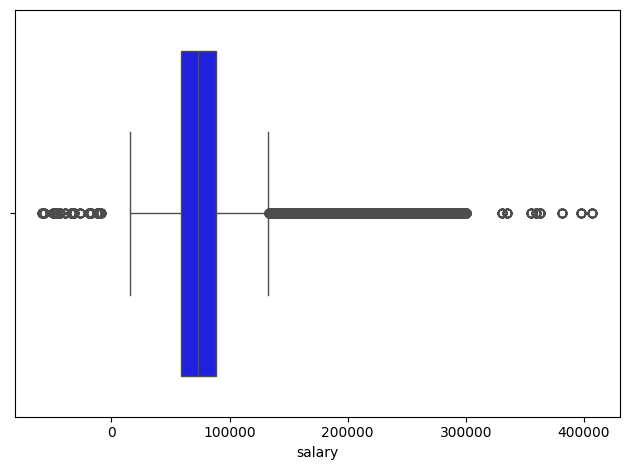

In [787]:
# Graficamos el salario para saber si tiene outliers
sns.boxplot(merged_df, x="salary", color="blue")
    
plt.tight_layout()

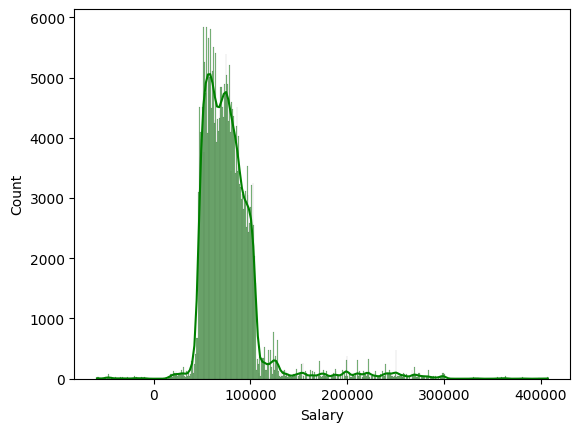

In [648]:
# Graficamos el salario para saber si tiene una distribución normal o no 
salarios = merged_df['Salary'].dropna()

sns.histplot(salarios, kde=True, color="green");

# Tiene una distribución asimétrica y con outliers, tiene datos negativos

In [649]:


# También realizaré el test de Kolmogorov-Smirnov (porque nuestra muestra tiene más de 500 datos), para comprobar si sigue una distribución normal
ks_statistic, p_value = stats.kstest(salarios, 'norm', args=(salarios.mean(), salarios.std()))

print(f"Estadístico KS: {ks_statistic}")
print(f"P-valor: {p_value}")

# Evaluación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No rechazamos la hipótesis nula: Los datos siguen una distribución normal.")

# los datos no siguen una distribución normal.

Estadístico KS: 0.1604984854435182
P-valor: 0.0
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


In [794]:
# Dado que faltan muchos valores (25%) hay outliers y la distribución no es normal ---> Imputamos los valores nulos con KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputar_salary = imputer.fit_transform(merged_df[["salary"]])
merged_df["salary"] = imputar_salary


In [842]:
# Crearé una copia de merged_df porque imputar con KNNImputer demora bastante tiempo

merged_df_copy = merged_df.copy()

In [843]:
# Tengo salarios negativos, considero que eso es una errata, entonces elimino esas filas. Primero quiero ver algunas de esas filas

negative_salaries= merged_df[merged_df["salary"] < 0] 
negative_salaries.sample(10)


,loyalty number,year,month,unaccompanied flights,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
247162,212128,2018,4,4,0,4,1696,211.25,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,None,None
67490,115505,2017,5,0,0,0,0,0.00,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,None,None
24088,491242,2017,2,0,0,0,0,0.00,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,None,None
103295,232755,2017,7,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,None,None
1716,194065,2017,1,0,0,0,0,0.00,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,None,None
38186,347013,2017,3,0,0,0,0,0.00,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,-39503.0,Married,Nova,6446.71,2018 Promotion,2018,3,None,None
12921,790475,2017,1,2,2,4,1292,129.00,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2,None,None
317808,906428,2018,7,16,0,16,3392,339.00,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,None,None
174277,430398,2017,11,0,0,0,0,0.00,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,None,None
310026,491242,2018,7,11,3,14,2254,225.00,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,None,None


In [809]:
negative_salaries["salary"].count()

480

In [844]:

## sobreescribo el dataframe y que considere solo las que no tienen negativos
merged_df = merged_df[merged_df['salary'] >= 0]

In [845]:
negative_salaries= merged_df[merged_df["salary"] < 0] 
negative_salaries

,loyalty number,year,month,unaccompanied flights,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month


In [814]:
# cuantas filas debería tener si eliminé los salarios negativos?
403760-480

403280

In [846]:
merged_df["loyalty number"].count()

403280

In [847]:
# Confirmamos si ya no hay nulos

merged_df.isnull().sum()[merged_df.isnull().sum()>0]

Series([], dtype: int64)

In [848]:
# Confirmamos el tipo de dato
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403280 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   loyalty number               403280 non-null  int64   
 1   year                         403280 non-null  int64   
 2   month                        403280 non-null  int64   
 3   unaccompanied flights        403280 non-null  int64   
 4   flights with companions      403280 non-null  int64   
 5   total flights                403280 non-null  int64   
 6   distance                     403280 non-null  int64   
 7   points accumulated           403280 non-null  float64 
 8   points redeemed              403280 non-null  int64   
 9   dollar cost points redeemed  403280 non-null  int64   
 10  country                      403280 non-null  object  
 11  province                     403280 non-null  object  
 12  city                         403280 non-null  obj

--------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------

# Visualización

In [849]:
## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
#  creamos un df llamado flights_per month
flights_per_month = merged_df.groupby(["month"])["total flights"].sum().reset_index()
flights_per_month

,month,total flights
0,1,119554
1,2,118790
2,3,162143
3,4,139104
4,5,177617
5,6,216640
6,7,245016
7,8,212244
8,9,171164
9,10,162708


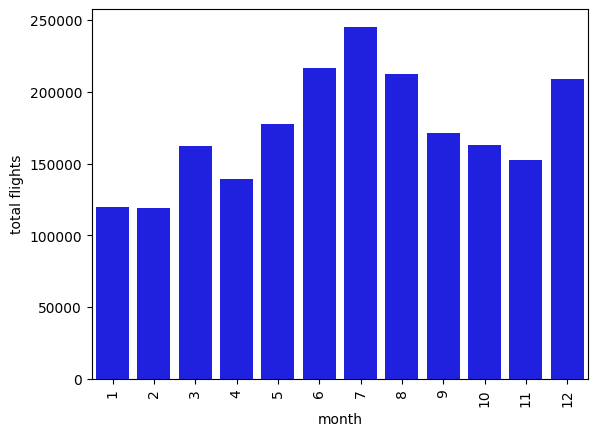

In [830]:
sns.barplot(data= flights_per_month, x = "month", y = "total flights", color= "blue");
plt.xticks(rotation=90);  # Rotar las etiquetas

## Los meses en los que se reservan más vuelos son junio, julio, agosto, y diciembre. Estos meses coinciden con el verano en Canada y navidad.

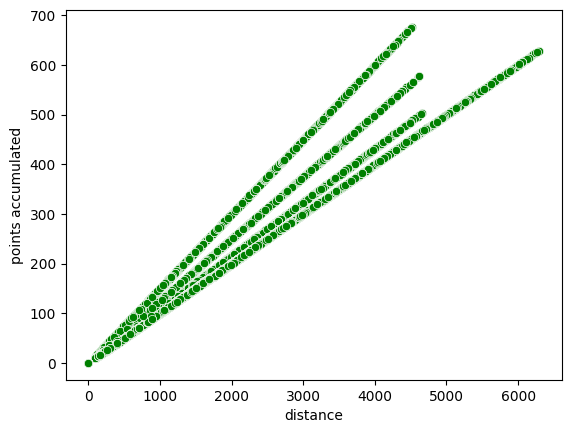

In [850]:
# Relación entre distancia y puntos

sns.scatterplot(data=merged_df, x="distance", y="points accumulated", color="green");

## Claramente hay una correlación positiva entre la distancia recorrida y los puntos que acumula el cliente. 
## Al haber 4 líneas, es probable que hayan 4 formas de calcular los puntos que se le dará a cada cliente, por ej. que según la 
## Loyalty card te den más puntos, o que según la permanencia el cálculo varíe. 

In [851]:
# Distribución de clientes por provincia
# Contar los Loyalty Numbers por provincia
clients_by_province = merged_df.groupby('province')['loyalty number'].nunique().reset_index()
clients_by_province

,province,loyalty number
0,Alberta,969
1,British Columbia,4404
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,256
5,Nova Scotia,518
6,Ontario,5399
7,Prince Edward Island,66
8,Quebec,3294
9,Saskatchewan,408


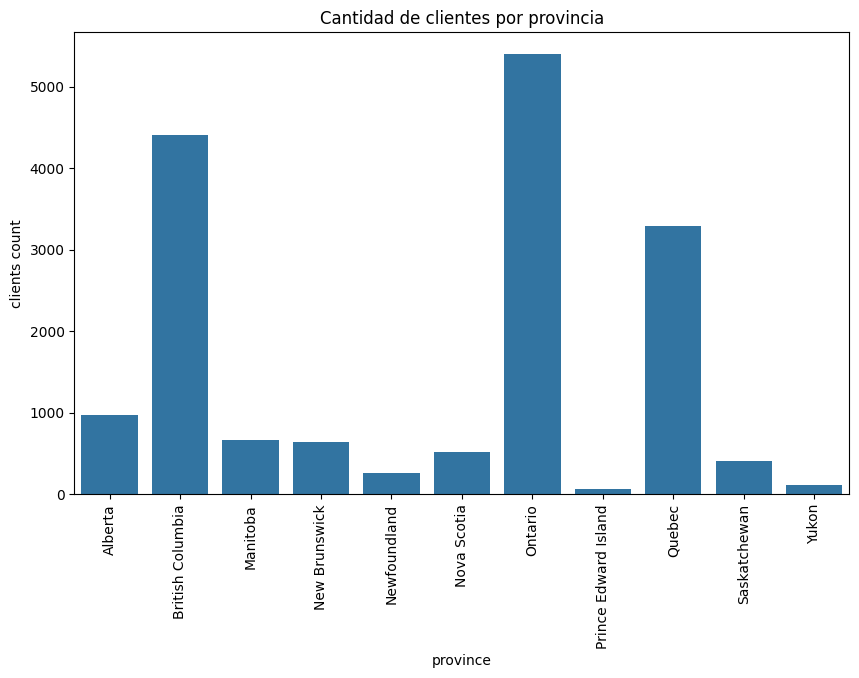

In [835]:


# Renombrar la columna para facilitar el grafico
clients_by_province.columns = ['province', 'clients count']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=clients_by_province, x='province', y='clients count')
plt.xticks(rotation=90)  # Rotar las etiquetas de provincia si es necesario
plt.title('Cantidad de clientes por provincia')
plt.show()

In [862]:
salary_education = merged_df[["education","salary"]]
salary_education.sample(3)

,education,salary
19129,College,79258.576285
112592,College,79258.576285
165196,Bachelor,63211.000000


In [865]:
salary_education.groupby("education")["salary"].mean()
## En esta tabla podemos ver que las personas con una educación de high school o menor tiene el promedio de salarios más bajo, a continuación (y es 
# algo curioso) las personas con un bachelor tienen el siguiente promedio más bajo, y es menor que el salario promedio de la categoría de personas que 
# hicieron college. Finalmente, las personas con un master tienen el siguiente promedio más alto y las personas con doctorado tienen el promedio de 
# salario más alto. Por tanto, pareciera que a mayor grado de educación, mayor el salario, a excepción del caso de college y bachelor.


C:\Users\trico\AppData\Local\Temp\ipykernel_13636\1208563274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_education.groupby("education")["salary"].mean()


education
High School or Below     61160.755016
College                  79258.576285
Bachelor                 72667.474362
Master                  103734.523724
Doctor                  178403.675202
Name: salary, dtype: float64

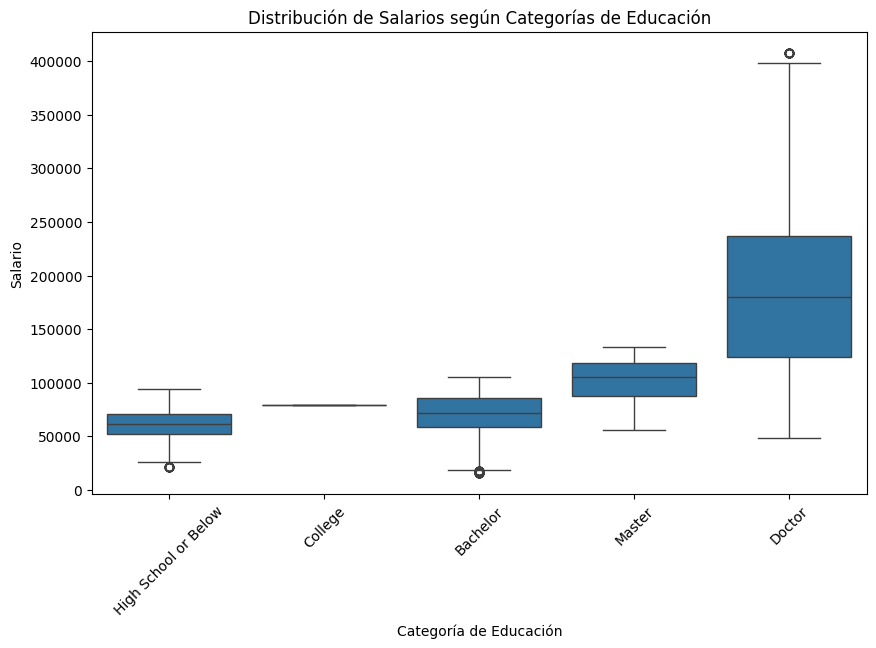

In [863]:
# Cómo se compara el salario promedio entre niveles educativos

# Crear el gráfico de boxplot
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.boxplot(x='education', y='salary', data=salary_education)

# Añadir título y etiquetas
plt.title('Distribución de Salarios según Categorías de Educación')
plt.xlabel('Categoría de Educación')
plt.ylabel('Salario')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si son largas
plt.show()

## En esta gráfica podemos ver que los salarios de las personas con un doctorado son mucho más dispersos, es decir lo que ganan las personas con 
# un doctorado varían mucho más que lo que ganan las personas con los otros grados de formación. 

Text(0.5, 1.0, 'Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

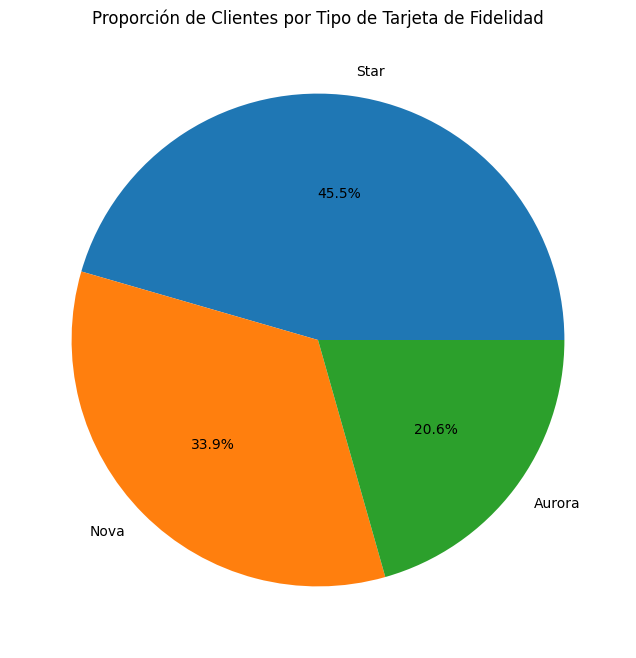

In [874]:
## Crear DF con la info necesaria
clients_per_loyalty_card = merged_df["loyalty card"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico si es necesario
plt.pie(clients_per_loyalty_card, labels=clients_per_loyalty_card.index, autopct='%1.1f%%')
plt.title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad")


Text(0, 0.5, 'Cantidad de Clientes')

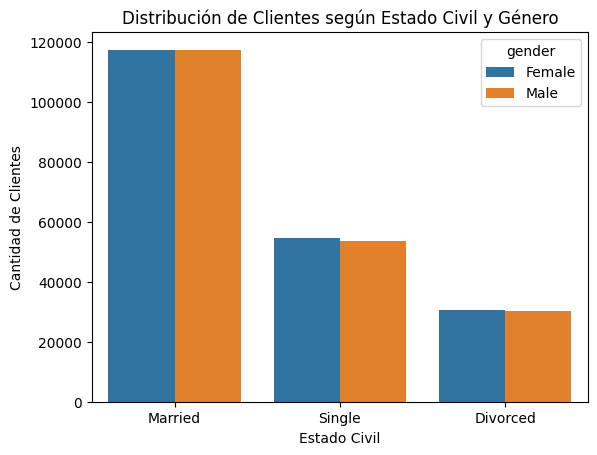

In [878]:
# Distribución de clientes según estado civil y género
sns.countplot(data=merged_df, x="marital status", hue="gender")

# Añadir título y etiquetas
plt.title("Distribución de Clientes según Estado Civil y Género")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de Clientes")